# Plateforme Agnostique de Traitement et d'Analyse des Textes
### Carnet d'expérimentation
---

## Sujet : Pipeline classif infox supervisé dataset labels

---

# Observations et environnement
---

In [1]:
random_state = 42

In [2]:
cd ../..

/Volumes/Geek/Work/Patat


In [3]:
import ast
import importlib
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
tqdm.pandas()

In [4]:
import patat.util.pd

filename = 'data/prod/230516-OIDS-Label.pickle'

df_label = pd.read_pickle(filename)

df_label['infox'].isna().sum()

df_label = df_label[df_label['infox'].notna()]

In [5]:
df_label['infox'].isna().sum()

0

In [6]:
df_label = df_label[df_label['infox'].notna()]

In [7]:
df_label.reset_index(inplace=True)

# Experience
---

## Decompte paragraphes

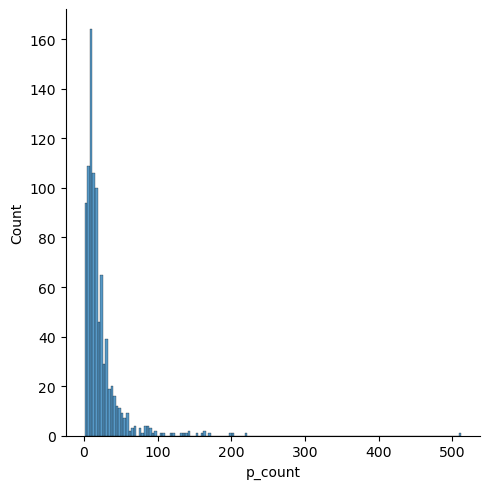

In [8]:
sns.displot(df_label,x='p_count')

In [9]:
p_count_max = 200

In [10]:
df_label[df_label['p_count']>=p_count_max][['title','infox','p_count']]

,title,infox,p_count
281,Georgia Meloni rafle la mise : un grand bravo ...,0.0,202
820,Le ginseng du pauvre contre le covid,1.0,512
883,Chronique N°46 – « Consentirez-vous à consenti...,1.0,221


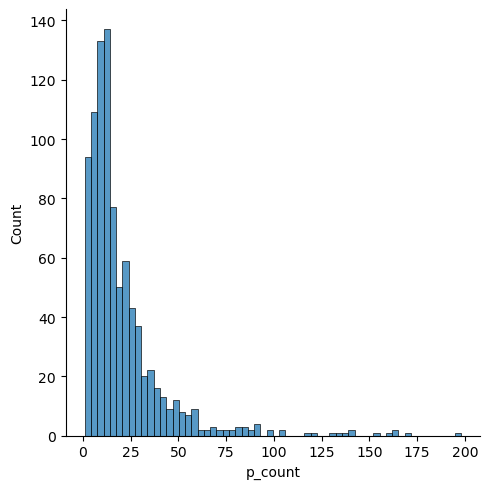

In [11]:
sns.displot(df_label[df_label['p_count']<p_count_max],x='p_count')

In [12]:
df_label = df_label[df_label['p_count']<p_count_max]

In [13]:
df_label.reset_index(inplace=True)

## Ignore Words

In [14]:
import patat.util.text
import patat.ml.lex_analyser
lex = patat.ml.lex_analyser.LexAnalyser()

### Lemmas

In [15]:
def lemmatize(text):
    return ' '.join(lex.get_lemmas_from_text(patat.util.text.preprocess(text)))

In [16]:
df_label['lemma_text']=df_label['text'].progress_apply(lemmatize)

  0%|          | 0/897 [00:00<?, ?it/s]

In [17]:
df_words = lex.get_df_words(texts= df_label['lemma_text'],values = df_label['infox'].astype(int), preprocessor=None, tokenizer= None)
### Rare Words
for occ_rare in [1,2,3,4,5,6,7]:
    df_words['rare_'+str(occ_rare)]=(df_words['count_0']<=occ_rare)&(df_words['count_1']<=occ_rare)
### Common words
for common_size in [50,80,120,200,500]:
    common_0 = df_words.sort_values('count_0',ascending=False).head(common_size).index
    common_1 = df_words.sort_values('count_1',ascending=False).head(common_size).index
    df_words['common_'+str(common_size)]=(df_words.index.isin(common_0))&(df_words.index.isin(common_1))
### Ignore Lemmas
ignore_lemmas={
    'None' : None,
    'small' : list(df_words[df_words['common_80']].index)+list(df_words[df_words['rare_1']].index),
    'medium' : list(df_words[df_words['common_80']].index)+list(df_words[df_words['rare_2']].index),
    'large' : list(df_words[df_words['common_200']].index)+list(df_words[df_words['rare_5']].index),
    'xlarge' : list(df_words[df_words['common_500']].index)+list(df_words[df_words['rare_7']].index),
}

## Words

In [18]:
preprocessor = patat.util.text.preprocess
#tokenizer = lex.get_lemmas_from_text
tokenizer = lex.get_words
#tokenizer=None

In [19]:
df_words = lex.get_df_words(texts= df_label['text'],values = df_label['infox'].astype(int), preprocessor=preprocessor, tokenizer= tokenizer)
### Rare Words
for occ_rare in [1,2,3,4,5,6,7]:
    df_words['rare_'+str(occ_rare)]=(df_words['count_0']<=occ_rare)&(df_words['count_1']<=occ_rare)
### Common words
for common_size in [50,80,120,200,500]:
    common_0 = df_words.sort_values('count_0',ascending=False).head(common_size).index
    common_1 = df_words.sort_values('count_1',ascending=False).head(common_size).index
    df_words['common_'+str(common_size)]=(df_words.index.isin(common_0))&(df_words.index.isin(common_1))
### Ignore Lemmas
ignore_words={
    'None' : None,
    'small' : list(df_words[df_words['common_80']].index)+list(df_words[df_words['rare_1']].index),
    'medium' : list(df_words[df_words['common_80']].index)+list(df_words[df_words['rare_2']].index),
    'large' : list(df_words[df_words['common_200']].index)+list(df_words[df_words['rare_5']].index),
    'xlarge' : list(df_words[df_words['common_500']].index)+list(df_words[df_words['rare_7']].index),
}

/opt/homebrew/Caskroom/miniforge/base/envs/pt39/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [20]:
df_words

,count_0,count_1,count,rare_1,rare_2,rare_3,rare_4,rare_5,rare_6,rare_7,common_50,common_80,common_120,common_200,common_500
de,22419,28482,50901,False,False,False,False,False,False,False,True,True,True,True,True
la,12442,15288,27730,False,False,False,False,False,False,False,True,True,True,True,True
le,9256,12237,21493,False,False,False,False,False,False,False,True,True,True,True,True
et,8595,12090,20685,False,False,False,False,False,False,False,True,True,True,True,True
les,8367,12370,20737,False,False,False,False,False,False,False,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
joues,0,3,3,False,False,True,True,True,True,True,False,False,False,False,False
joueront,0,1,1,True,True,True,True,True,True,True,False,False,False,False,False
josiah,0,1,1,True,True,True,True,True,True,True,False,False,False,False,False
joshua,0,4,4,False,False,False,True,True,True,True,False,False,False,False,False


In [21]:
common_200 = list(df_words[df_words['common_200']].index)

In [22]:
common_80 = list(df_words[df_words['common_80']].index)

## Textes partiels

In [52]:
def partial_texts(text,p_count):
    parags = text.split('\n')
    result='\n'.join(parags[:p_count])
    return result

In [54]:
text

'Prenant acte d’un vote défavorable, Elon Musk annonce son départ prochain de la tête de Twitter\nAprès avoir sondé les utilisateurs du réseau social, qui ont voté contre son maintien comme dirigeant de la plateforme, le milliardaire a annoncé se mettre en quête d’un successeur. La situation financière de l’entreprise reste difficile.\nElon Musk a annoncé le 20 décembre sur Twitter son intention de quitter la tête du réseau social dès lors qu’il aura «trouvé quelqu’un d’assez fou» pour le remplacer, précisant qu’il consacrerait son énergie aux «équipes logiciel et serveurs» une fois que ce successeur aura été nommé.\nLe propriétaire de la plateforme réagissait au résultat du sondage qu’il avait lui-même initié la veille sur Twitter, demandant s’il devait se retirer de la tête de l’entreprise ou non. Environ 57% des 17 millions de votant avaient répondu par l’affirmative, un résultat dont Elon Musk a finalement pris acte.\nI will resign as CEO as soon as I find someone foolish enough to

In [55]:
pt = partial_texts(text,2)
print(pt)

Prenant acte d’un vote défavorable, Elon Musk annonce son départ prochain de la tête de Twitter
Après avoir sondé les utilisateurs du réseau social, qui ont voté contre son maintien comme dirigeant de la plateforme, le milliardaire a annoncé se mettre en quête d’un successeur. La situation financière de l’entreprise reste difficile.


## Tests Entrainement

In [100]:
df_label=df_label.sample(frac=1,random_state=random_state)

In [101]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline

In [102]:
nb_parags = 1

def cut_text(text):
    return partial_texts(text,nb_parags)

In [113]:
logreg = LogisticRegression(C=100, random_state=random_state, solver='lbfgs', multi_class='ovr', max_iter=1000)
neuralnet = MLPClassifier(alpha=1, max_iter=1000, hidden_layer_sizes=(8,8), max_iter=2000, random_state=random_state)


In [134]:
iw = ignore_lemmas['small']
preprocessor = lemmatize


pipelineLR = Pipeline(steps = [
    ('vectorizer',TfidfVectorizer(preprocessor=preprocessor, tokenizer=None, stop_words=iw)), 
    ('classifier',logreg)
                  ])

pipelineMLPC = Pipeline(steps = [
    ('vectorizer',TfidfVectorizer(preprocessor=preprocessor, tokenizer=None, stop_words=iw)), 
    ('classifier',neuralnet)
                  ])

In [139]:
df_means = {}
for nb_parags in [1,2,3,5,8,13,21,34]:
    
    print(f'Crossvalidating nb_parags={nb_parags}')

    X = df_label['text'].apply(cut_text)
    y = df_label['infox']

    classifier = pipelineMLPC
    #classifier = pipelineLR
    scores = cross_validate(classifier, X, y, cv=5,scoring=('roc_auc','f1','accuracy','precision','recall'))
    df_scores=pd.DataFrame(scores)
    df_means[nb_parags] = df_scores.describe().loc['mean']


Crossvalidating nb_parags=1
Crossvalidating nb_parags=2
Crossvalidating nb_parags=3
Crossvalidating nb_parags=5
Crossvalidating nb_parags=8
Crossvalidating nb_parags=13
Crossvalidating nb_parags=21
Crossvalidating nb_parags=34


/opt/homebrew/Caskroom/miniforge/base/envs/gpu39/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [140]:
bench = pd.DataFrame(df_means)
bench

,1,2,3,5,8,13,21,34
fit_time,0.942018,1.409623,1.837831,2.799151,3.928331,4.699085,5.934447,7.533497
score_time,0.008578,0.023559,0.040808,0.070105,0.104479,0.145799,0.192011,0.227825
test_roc_auc,0.716515,0.787648,0.802535,0.829397,0.842454,0.843508,0.853097,0.857044
test_f1,0.589511,0.634611,0.623185,0.698431,0.714293,0.692642,0.710990,0.737535
test_accuracy,0.684444,0.716667,0.714444,0.764444,0.775556,0.758889,0.775556,0.782222
test_precision,0.631456,0.677313,0.681463,0.740960,0.759141,0.734620,0.762435,0.739312
test_recall,0.560757,0.603495,0.582270,0.662270,0.678378,0.659568,0.667604,0.739964


<Axes: >

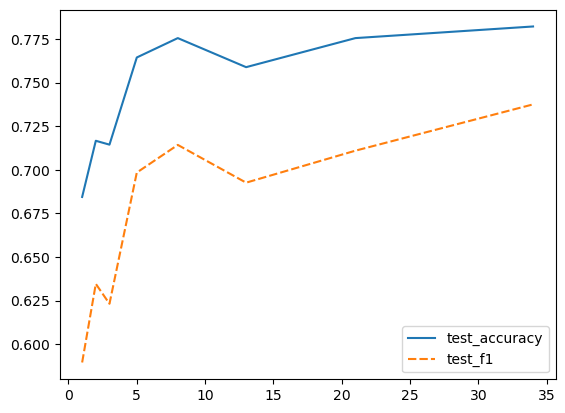

In [141]:
sns.lineplot(data=bench.T[['test_accuracy','test_f1']])

<Axes: >

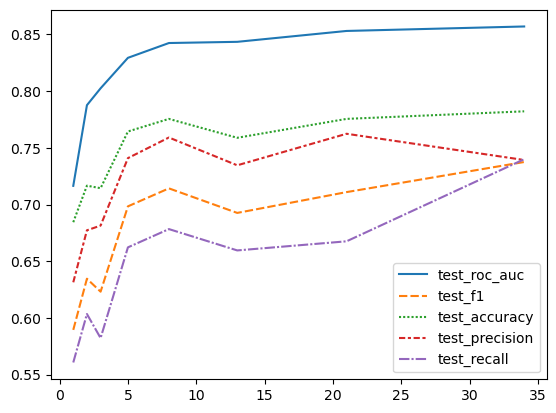

In [142]:
sns.lineplot(data=bench.T.drop(columns=['fit_time','score_time']))

In [136]:
bench = pd.DataFrame(df_means)
bench

,1,2,3,5,8,13,21,34
fit_time,0.027199,0.063942,0.108765,0.207874,0.313039,0.364817,0.544717,0.627997
score_time,0.008207,0.022069,0.038516,0.068229,0.101681,0.142431,0.189877,0.221977
test_roc_auc,0.714239,0.785892,0.801491,0.829497,0.841994,0.843407,0.852818,0.859103
test_f1,0.596868,0.633293,0.627708,0.687528,0.712049,0.696478,0.722164,0.731711
test_accuracy,0.684444,0.716667,0.717778,0.758889,0.773333,0.763333,0.780000,0.785556
test_precision,0.629603,0.677701,0.685246,0.743290,0.754542,0.742529,0.758134,0.762821
test_recall,0.574090,0.600829,0.587640,0.640937,0.678342,0.659532,0.691928,0.705081


## Entrainement sur tout le dataset

In [30]:
predictor = pipelineLR
predictor.fit(df_label['text'], df_label['infox'])

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(preprocessor=<function preprocess at 0x17c97b160>,
                                 stop_words=['de', 'la', 'le', 'et', 'les',
                                             'des', 'en', 'un', 'est', 'que',
                                             'du', 'une', 'être', 'avoir',
                                             'pour', 'qui', 'dans', 'il', 'par',
                                             'pas', 'sur', 'au', 'ce', 'plaire',
                                             'faire', 'ne', 'qu', 'pouvoir',
                                             'se', 'avec', ...])),
                ('classifier',
                 LogisticRegression(C=5, max_iter=1000, multi_class='ovr',
                                    random_state=42))])

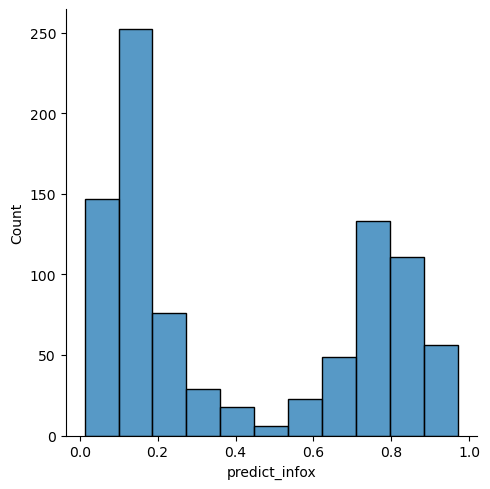

In [31]:
df_label['predict_infox']=predictor.predict_proba(df_label['text'])[:,1]
sns.displot(df_label,x='predict_infox')

# Sauvegarde des résultats
---

# Conclusions
---

# Bricolages
---

In [25]:
import patat.util.file

In [27]:
patat.util.file.pickle_save(common_200,'data/tmp/common_200.pickle')